<h1 align=center> Exploratory Data Analysis

### En este Notebook se realizará la primera exploración del dataset otorgado por el cliente para el Proyecto

Importamos librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from dbfread import DBF

### Exploramos el archivo ElectricCarData_Clean.csv

In [2]:
df1 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\ElectricCarData_Clean.csv')

In [11]:
df1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


Revisamos duplicados

In [24]:
duplicated_rows = df1[df1.duplicated()]
duplicated_rows

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FastCharge_KmH2


Revisamos tipos de datos

In [18]:
print(df1.dtypes)

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object


Este Dataset nos muestra los distintos carros eléctricos disponibles, con sus características como marca, modelo, velocidad máxima, carga rápida, asientos, etc

Notamos que FastCharge_KmH es tipo object, siendo que deberían ser números. Revisamos

In [22]:
df1['FastCharge_KmH2']=pd.to_numeric(df1['FastCharge_KmH'], errors='coerce')
filas_sin_numero = df1[df1['FastCharge_KmH2'].isna()]
filas_sin_numero

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FastCharge_KmH2
57,Renault,Twingo ZE,12.6,135,130,164,-,No,RWD,Type 2,Hatchback,A,4,24790,NaN
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000,NaN
77,Smart,EQ forfour,12.7,130,95,176,-,No,RWD,Type 2,Hatchback,A,4,22030,NaN
82,Smart,EQ fortwo coupe,11.6,130,100,167,-,No,RWD,Type 2,Hatchback,A,2,21387,NaN
91,Smart,EQ fortwo cabrio,11.9,130,95,176,-,No,RWD,Type 2,Cabrio,A,2,24565,NaN


Las entradas sin datos en 'FastCharge_KmH' son debido a que estos modelos de auto no tienen carga rápida, por lo tanto no les corresponde valor ahí. <br>
Se decide convertir los "-" en NaN para tener una columna numérica

Revisamos Outliers

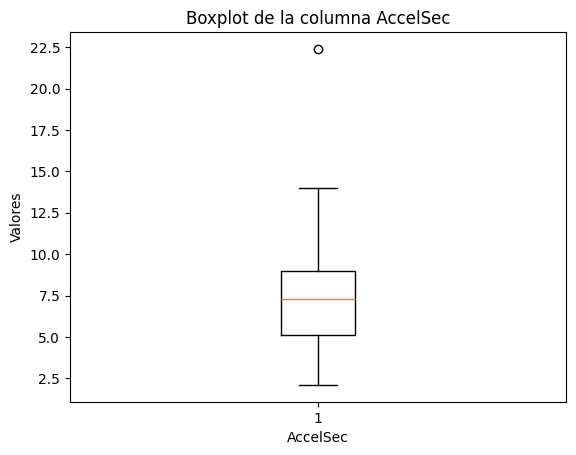

In [38]:
plt.boxplot(df1['AccelSec'])
plt.title('Boxplot de la columna AccelSec')
plt.xlabel('AccelSec')
plt.ylabel('Valores')
plt.show()

Analizamos el Outlier:

In [36]:
columna = 'AccelSec'

df1['z_score'] = np.abs(stats.zscore(df1[columna]))

outliers = df1[df1['z_score'] > 3]
outliers

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FastCharge_KmH2,z_score
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000,NaN,4.996719


Notamos que la columna AccelSec de este Renault es muy alta comparada con sus pares,pero es un dato real de las capacidad del vehículo

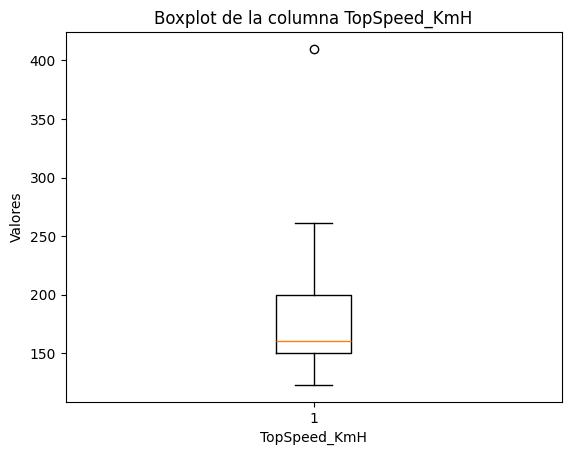

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FastCharge_KmH2,z_score
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000,920.0,5.32289


In [40]:
plt.boxplot(df1['TopSpeed_KmH'])
plt.title('Boxplot de la columna TopSpeed_KmH')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Valores')
plt.show()

df1['z_score'] = np.abs(stats.zscore(df1['TopSpeed_KmH']))

# Filtra las filas que contienen outliers
outliers = df1[df1['z_score'] > 3]
outliers

El Testa Roadster es un outlier alto para TopSpeed, pero revisando características del auto no se considera un outlier corregible

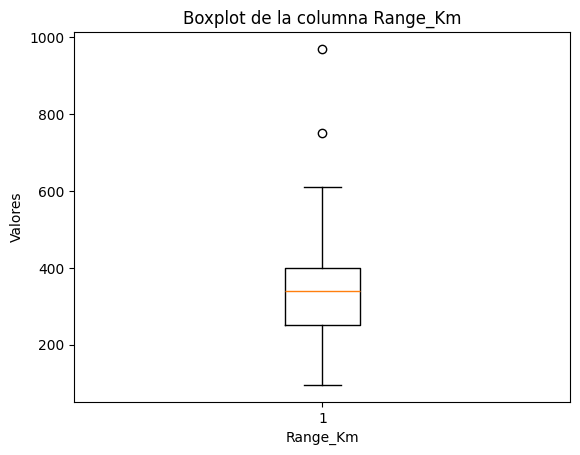

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FastCharge_KmH2,z_score
33,Tesla,Cybertruck Tri Motor,3.0,210,750,267,710,Yes,AWD,Type 2 CCS,Pickup,N,6,75000,710.0,3.279183
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000,920.0,5.033552


In [41]:
plt.boxplot(df1['Range_Km'])
plt.title('Boxplot de la columna Range_Km')
plt.xlabel('Range_Km')
plt.ylabel('Valores')
plt.show()

df1['z_score'] = np.abs(stats.zscore(df1['Range_Km']))

# Filtra las filas que contienen outliers
outliers = df1[df1['z_score'] > 3]
outliers

Los 2 outliers en Range_Km son explicables por el rendimiento particular de los modelos respectivos

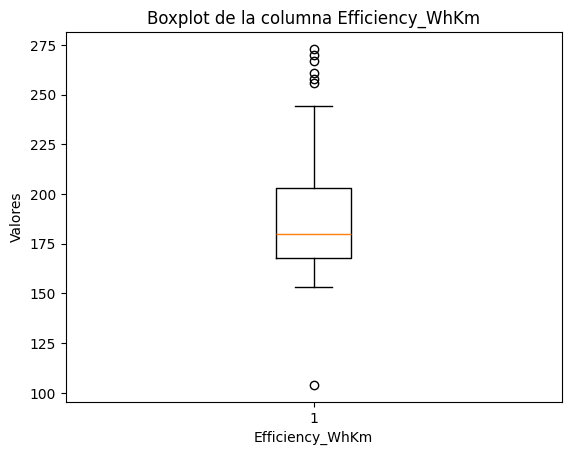

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FastCharge_KmH2,z_score


In [44]:
plt.boxplot(df1['Efficiency_WhKm'])
plt.title('Boxplot de la columna Efficiency_WhKm')
plt.xlabel('Efficiency_WhKm')
plt.ylabel('Valores')
plt.show()

df1['z_score'] = np.abs(stats.zscore(df1['Efficiency_WhKm']))

# Filtra las filas que contienen outliers
outliers = df1[df1['z_score'] > 3]
outliers

Se ven múltiples Outliers en Efficiency_WhKm, pero no superan 3 con su z-score, por lo que no se consideran outliers relevantes

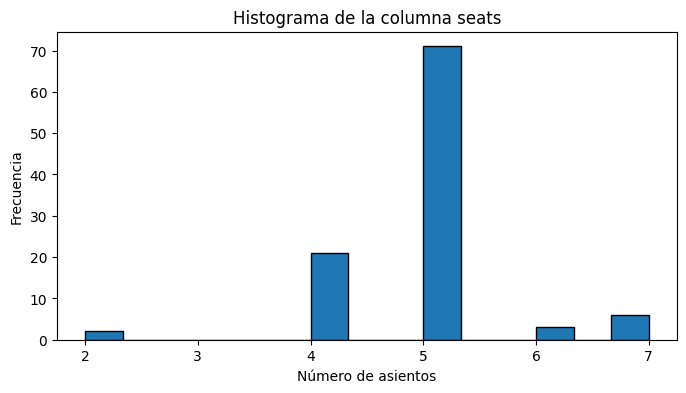

In [51]:
plt.figure(figsize=(8, 4))
plt.hist(df1['Seats'], bins=15, edgecolor='black')

# Configurar etiquetas y título
plt.title('Histograma de la columna seats')
plt.xlabel('Número de asientos')
plt.ylabel('Frecuencia')
plt.show()

Vemos que los asientos disponibles de los vehículos van desde 2 hasta 7, sin ninguno tener 3 asientos

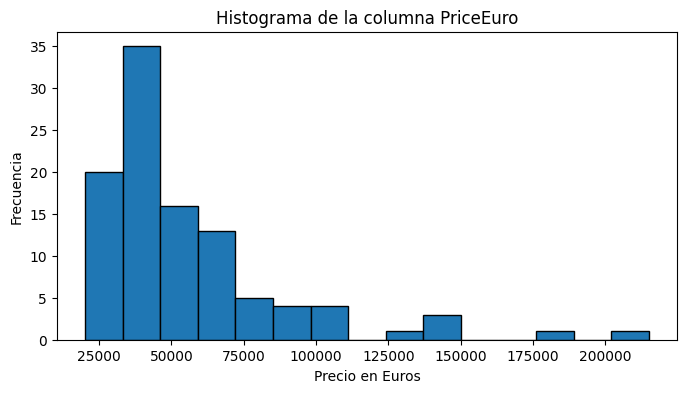

In [52]:
plt.figure(figsize=(8, 4))
plt.hist(df1['PriceEuro'], bins=15, edgecolor='black')

# Configurar etiquetas y título
plt.title('Histograma de la columna PriceEuro')
plt.xlabel('Precio en Euros')
plt.ylabel('Frecuencia')
plt.show()

En PriceEuro vemos que hay outliers altos, pero son simplemente modelos mucho más costosos

## Archivo Taxi+_zone_lookup.csv

In [54]:
df2 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\Taxi+_zone_lookup.csv')
df2.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Observamos las columnas Borough, Zone y service_zone que son strings de lugares o zonas, y un ID para cada entrada

In [60]:
columns_to_consider = df2.columns.difference(['LocationID'])

# Encontrar las filas duplicadas considerando solo las columnas especificadas
duplicated_rows = df2[df2.duplicated(subset=columns_to_consider, keep=False)]
duplicated_rows

,LocationID,Borough,Zone,service_zone
55,56,Queens,Corona,Boro Zone
56,57,Queens,Corona,Boro Zone
102,103,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone
103,104,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone
104,105,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone


In [72]:
boroughs = df2['Borough'].unique()
boroughs

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn',
       'Unknown'], dtype=object)

Notamos algunos datos duplicados, que podrían ser varias locaciones de servicio bajo el mismo nombre, pero distinta id

In [59]:
unique_counts = df2.nunique()
unique_counts

LocationID      265
Borough           7
Zone            261
service_zone      4
dtype: int64

Revisamos nulos y faltantes

In [58]:
filas_nulas = df2[df2.isna().any(axis=1)]
filas_nulas

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


Encontramos 2 entradas con datos faltantes y nulos. Se deciden borrar

## Archivo Taxi_zones.dbf

In [66]:
# Leer el archivo .dbf
dbf_file = r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\taxi_zones.dbf'  # Reemplaza con la ruta a tu archivo .dbf
table = DBF(dbf_file)

# Convertir el archivo .dbf a un DataFrame de pandas
df3 = pd.DataFrame(iter(table))
df3

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx
259,260,0.133514,0.000422,Woodside,260,Queens
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
261,262,0.049064,0.000122,Yorkville East,262,Manhattan


Observamos que tenemos repetida una columna de ID que resulta redundante

In [71]:
boroughs = df3['borough'].unique()
boroughs

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn'],
      dtype=object)

In [73]:
df3.isna().sum()

OBJECTID      0
Shape_Leng    0
Shape_Area    0
zone          0
LocationID    0
borough       0
dtype: int64

Notamos que no hay duplicados, salvo los casos Queen: corona y Manhattan: governor's island mismos del dataset anterior <br>
Ni datos faltantes<br>
También, esta tabla es posible combinar con la tabla de taxi+_zone_lookup anterior

## Archivo Vehicle fuel economy data.csv

In [77]:
df4 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\Vehicle Fuel Economy Data.csv')
df4.head()

C:\Users\migue\AppData\Local\Temp\ipykernel_18832\1615785435.py:1: DtypeWarning: Columns (73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\Vehicle Fuel Economy Data.csv')


,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,NSX,NaN,0.0,NaN,04-04-2016,26-09-2016,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,BMX,NaN,0.0,NaN,12-04-2016,16-09-2016,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,KMX,NaN,0.0,NaN,12-04-2016,02-12-2016,N,0.0,0.0,0.0


In [79]:
df4.columns

Index(['Year', 'Manufacturer', 'Model', 'barrels08', 'barrelsA08', 'charge240',
       'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF',
       'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'VClass',
       'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'youSaveSpend', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor',
       'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn',
       'modifiedOn', 's

Para este proyecto podemos prescindir de algunas columnas, quedándonos con:
- year
- manufacturer 
- model
- barrels08
- city08
- co2
- co2TailpipeGpm
- comb08
- drive
- fuelcost08
- fueltype1
- ghg1score
- highway08
- id
- Ucity


 

In [98]:
columnas_quedan = ['Year', 'Manufacturer', 'Model', 'barrels08', 'city08', 'co2', 'co2TailpipeGpm', 'comb08', 'drive', 'fuelCost08', 'fuelType1', 'ghgScore', 'highway08', 'id', 'UCity']
df4 = df4[columnas_quedan]
df4

,Year,Manufacturer,Model,barrels08,city08,co2,co2TailpipeGpm,comb08,drive,fuelCost08,fuelType1,ghgScore,highway08,id,UCity
0,2017,BMW,M6 Coupe,17.500588,15.0,519.0,519.000000,17.0,Rear-Wheel Drive,3850.0,Premium Gasoline,3.0,22.0,37330.0,17.9989
1,2017,BMW,X3 sDrive28i,12.396250,21.0,374.0,374.000000,24.0,Rear-Wheel Drive,2700.0,Premium Gasoline,5.0,28.0,37343.0,26.7866
2,2016,Infiniti,Q50S Red Sport,13.523182,20.0,402.0,402.000000,22.0,Rear-Wheel Drive,2950.0,Premium Gasoline,5.0,26.0,37348.0,25.1000
3,2017,MINI,John Cooper Works Convertible,11.018889,24.0,327.0,327.000000,27.0,Front-Wheel Drive,2400.0,Premium Gasoline,6.0,32.0,37352.0,30.8534
4,2017,Kia,Sedona SX,14.167143,18.0,433.0,433.000000,21.0,Front-Wheel Drive,2550.0,Regular Gasoline,4.0,25.0,37355.0,22.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46181,1993,Plymouth,Sundance/Duster,12.935217,21.0,-1.0,386.391304,23.0,Front-Wheel Drive,2300.0,Regular Gasoline,-1.0,26.0,9973.0,26.0000
46182,1993,Pontiac,Grand Am,14.167143,18.0,-1.0,423.190476,21.0,Front-Wheel Drive,2550.0,Regular Gasoline,-1.0,26.0,9981.0,22.0000
46183,1993,Saab,900,14.167143,18.0,-1.0,423.190476,21.0,Front-Wheel Drive,NaN,NaN,NaN,NaN,NaN,NaN
46184,1993,Subaru,Legacy,13.523182,19.0,-1.0,403.954545,22.0,Front-Wheel Drive,2400.0,Regular Gasoline,-1.0,26.0,9995.0,24.0000


## Archivo Alternative Fuel Vehicles US.csv

In [99]:
df5 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\Alternative Fuel Vehicles US.csv')
df5

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Street Sweeper,HSP,NaN,TYMCO,CNG - Compressed Natural Gas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cummins Westport L9N 8.9L Near Zero,NaN,NaN
878,Step Van,(various models),NaN,Utilimaster,Electric,NaN,NaN,NaN,NaN,NaN,...,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,According to manufacturer: Various platforms a...,NaN
879,Transit Bus,CX45E,NaN,Van Hool,Electric,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Up to 56,Siemens ELFA2 Electric Drive System 360kW,According to manufacturer: 676 kWh battery sto...,NaN
880,Tractor,VNR Electric - Class 8,NaN,Volvo,Electric,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"According to manufacturer: 340kW; 455hp; 4,051...",NaN


Este archivo tiene muchos valores Nulos o NaN, pero es debido a la clasificación por distintas fuentes de energía y no por errores de recolección de datos

In [86]:
df5.columns

Index(['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
       'All-Electric Range', 'PHEV Total Range',
       'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
       'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Transmission Make', 'Engine Type', 'Engine Size',
       'Engine Cylinder Count', 'Number of Passengers',
       'Heavy-Duty Power System', 'Notes', 'Drivetrain'],
      dtype='object')

Nos quedamos solo con algunas columnas de interés

In [87]:
columnas_quedan = ['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
      'Alternative Fuel Economy City', 'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Combined', 'Drivetrain']
df5=df5[columnas_quedan]
df5.head()

,Category,Model,Model Year,Manufacturer,Fuel,Alternative Fuel Economy City,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Combined,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,21.0,21.0,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,29.0,32.0,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,28.0,31.0,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,24.0,26.0,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,26.0,29.0,AWD


Existen datos nulos, por las distintas tecnologías de combustible, existe la fuel economy en alternative y en conventional fuel

## Archivo Light Duty Vehicles.csv

In [5]:
df6 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\Light Duty Vehicles.csv')
df6

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,656,3,1.0,225,9,Ram Van B250,1992,NaN,NaN,NaN,...,http://www.dodge.com,Van,CNG,CNG - Compressed Natural Gas,Dedicated,NaN,NaN,NaN,NaN,NaN
3004,660,49,5.0,225,27,Spirit FFV,1992,NaN,NaN,NaN,...,http://www.dodge.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3005,658,49,5.0,219,9,Econoline-Fleet Demo FFV,1992,NaN,NaN,NaN,...,https://www.ford.com,Van,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3006,650,49,5.0,215,27,Lumina FFV,1991,NaN,NaN,NaN,...,http://www.chevrolet.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN


In [6]:
df6.columns

Index(['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID',
       'Category ID', 'Model', 'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined',
       'Conventional Fuel Economy City', 'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Engine Type', 'Engine Size', 'Engine Cylinder Count',
       'Engine Description', 'Manufacturer', 'Manufacturer URL', 'Category',
       'Fuel Code', 'Fuel', 'Fuel Configuration Name', 'Electric-Only Range',
       'PHEV Total Range', 'PHEV Type', 'Notes', 'Drivetrain'],
      dtype='object')

No necesitaremos todas las columnas, se dejan solo algunas

In [7]:
columnas_quedan = ['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID', 'Model', 'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Combined',
       'Conventional Fuel Economy City','Conventional Fuel Economy Combined','Manufacturer', 'Category', 'Fuel Code', 'Fuel', 'Drivetrain' ]
df6=df6[columnas_quedan]
df6.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Combined,Manufacturer,Category,Fuel Code,Fuel,Drivetrain
0,13044,45,9.0,365,NSX,2022,NaN,NaN,21.0,21.0,Acura,Sedan/Wagon,HYBR,Hybrid Electric,AWD
1,12854,45,9.0,377,A3,2022,NaN,NaN,29.0,32.0,Audi,Sedan/Wagon,HYBR,Hybrid Electric,FWD
2,12842,45,9.0,377,A3 quattro,2022,NaN,NaN,28.0,31.0,Audi,Sedan/Wagon,HYBR,Hybrid Electric,AWD
3,12783,45,9.0,377,A4 allroad quattro,2022,NaN,NaN,24.0,26.0,Audi,Sedan/Wagon,HYBR,Hybrid Electric,AWD
4,12782,45,9.0,377,A4 quattro,2022,NaN,NaN,26.0,29.0,Audi,Sedan/Wagon,HYBR,Hybrid Electric,AWD


In [10]:
df6['Fuel Code'].unique()

array(['HYBR', 'PHEV', 'ELEC', 'BD', 'E85_GSLN', 'H2', 'LPG_GSLN',
       'CNG_GSLN', 'CNG', 'LPG', 'M85_GSLN'], dtype=object)

## Archivo Electric and Alternative Fuel Charging Stations.csv

In [101]:
df7 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\Electric and Alternative Fuel Charging Stations.csv')
df7

C:\Users\migue\AppData\Local\Temp\ipykernel_18832\1059649743.py:1: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df7 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Datasets Taxi\Electric and Alternative Fuel Charging Stations.csv')


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70401,ELEC,SCHLITZ PARK SCHLITZ PARK,1555 N River Center Dr,NaN,Milwaukee,WI,53212,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70402,ELEC,NEXUS EAST STATION 2,720 Airport Blvd,NaN,Austin,TX,78702,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70403,ELEC,Raley's,6119 Horseshoe Bar Rd,NaN,Loomis,CA,95650,NaN,877-455-3833,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70404,ELEC,13601 Glenoaks blvd,13601 Glenoaks blvd,NaN,Los Angeles,CA,91342,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df7.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

Se mantienen solo las columnas relevantes para este análisis

In [97]:
columnas_quedan= ['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State', 'ZIP', 'Groups With Access Code','Latitude', 'Longitude', 'ID', 'Country' ]
df7 = df7[columnas_quedan]
df7.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Groups With Access Code,Latitude,Longitude,ID,Country
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,36107,Private,32.367916,-86.267021,17,US
1,CNG,PS Energy - Atlanta,340 Whitehall St,Atlanta,GA,30303,Public - Card key at all times,33.745843,-84.398837,42,US
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,30324,Private - Government only,33.821911,-84.367461,45,US
3,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,30336,Private,33.760256,-84.543822,64,US
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,72903,Public - Credit card at all times,35.362213,-94.375338,73,US


Observaciones de EDA:

- No hay duplicados en este dataset
- No existen outliers que representen errores de ingesta de datos
- Algunos nulos corregibles en dataset de zonas
- Nulos justificados por tipos de combustible en tablas de eficiencia de automoviles
- eliminación de columnas no relevantes para el análisis a realizar